In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("C:/Users/Cicil/Desktop/VS code project/cognorise project/archive Customer Personality Analysis/marketing_campaign.csv", sep="\t")
print("Number of dfpoints:", len(df))
df

Number of dfpoints: 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [4]:
df.head().T

,0,1,2,3,4
ID,5524,2174,4141,6182,5324
Year_Birth,1957,1954,1965,1984,1981
Education,Graduation,Graduation,Graduation,Graduation,PhD
Marital_Status,Single,Single,Together,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0
Kidhome,0,1,0,1,1
Teenhome,0,1,0,0,0
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014
Recency,58,38,26,26,94
MntWines,635,11,426,11,173


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isna().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


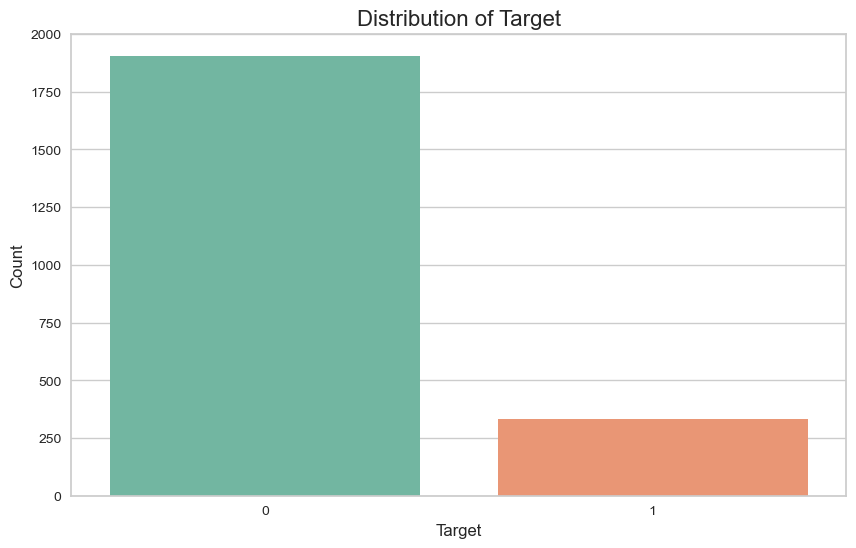

In [9]:
df.describe(include='object')
plt.figure(figsize=(10, 6))
plot = sns.countplot(data=df, x='Response', palette='Set2')
plot.set_title('Distribution of Target', fontsize=16)
plot.set_xlabel('Target', fontsize=12)
plot.set_ylabel('Count', fontsize=12)
plt.show()

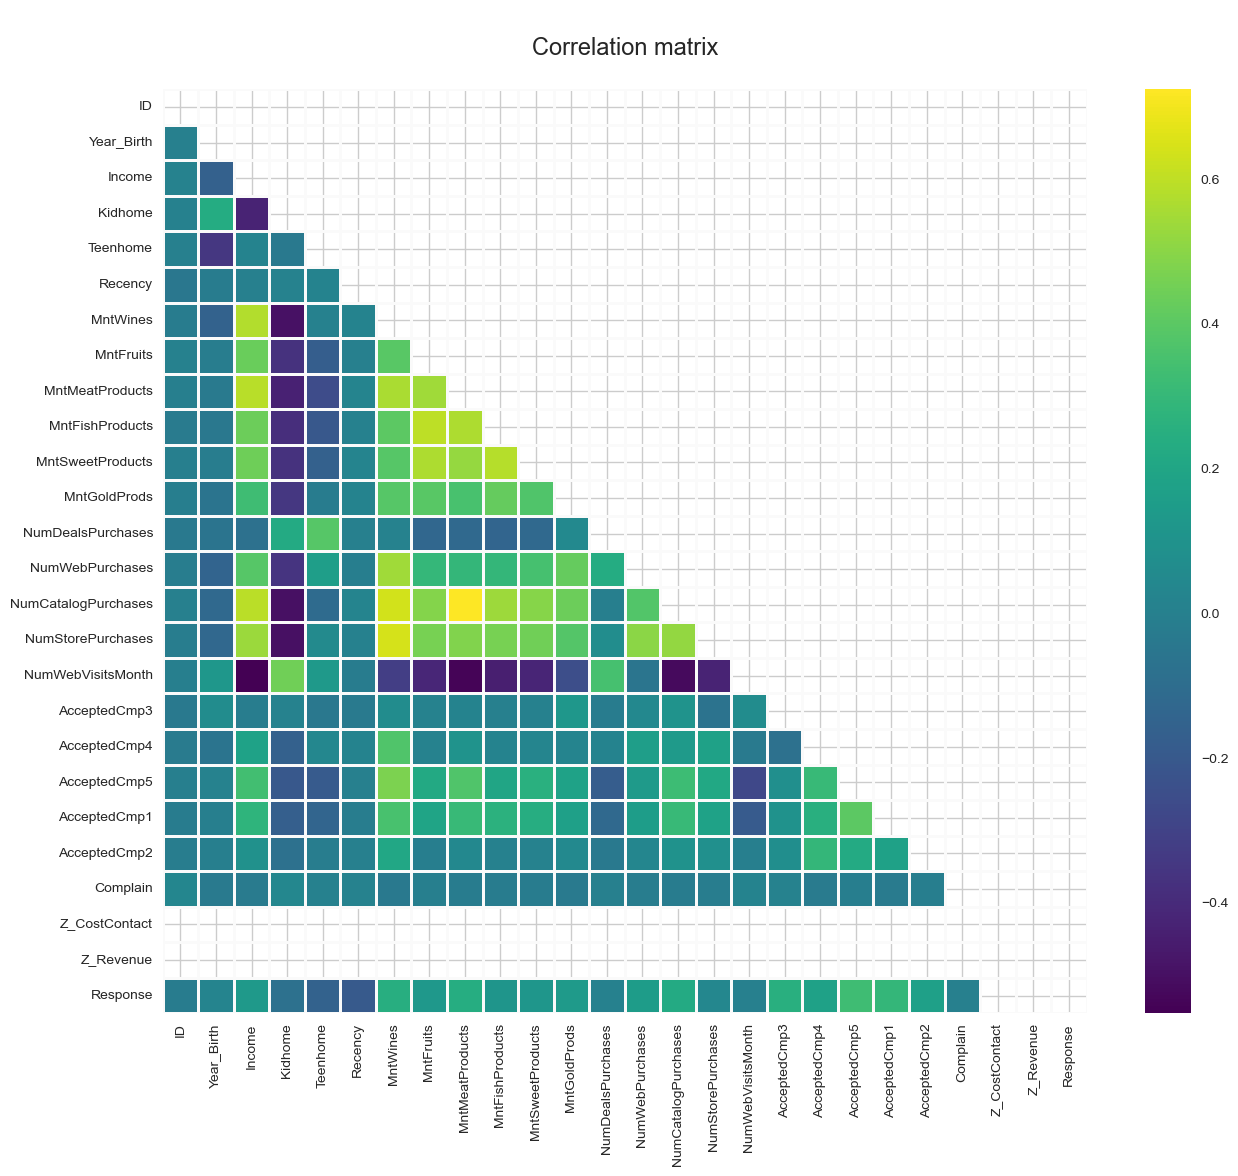

In [10]:
corr_matrix = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(15,12))
sns.heatmap(data=corr_matrix, mask=mask, cmap='viridis', linewidths=1, square=True, linecolor='#fafafa')
plt.title('\nCorrelation matrix\n', fontsize=17)
plt.show()

<Axes: >

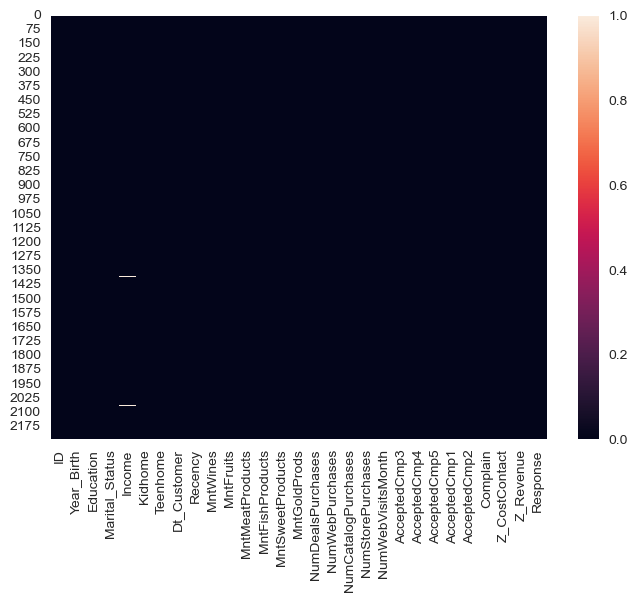

In [11]:
sns.heatmap(df.isnull())

In [12]:
df=df.dropna()
df.shape

(2216, 29)

In [13]:
single_value_columns = df.columns[df.nunique() == 1].tolist()
df.drop(single_value_columns,axis=1,inplace=True)

In [14]:
['Z_CostContact', 'Z_Revenue']

['Z_CostContact', 'Z_Revenue']

In [15]:
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [16]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")
df.drop(["Dt_Customer"],axis=1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,4,7,0,0,0,0,0,0,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,2,5,0,0,0,0,0,0,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,10,4,0,0,0,0,0,0,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,4,6,0,0,0,0,0,0,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,6,5,0,0,0,0,0,0,0,13910400000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,...,4,5,0,0,0,0,0,0,0,32918400000000000
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,...,5,7,0,0,0,1,0,0,0,1641600000000000
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,...,13,6,0,1,0,0,0,0,0,13392000000000000
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,...,10,3,0,0,0,0,0,0,0,13478400000000000


In [17]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
spent=["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
df.drop(spent,axis=1,inplace=True)

In [18]:
def onehotencoder(data,feature):
    data[feature]= data[feature].astype('category').cat.codes
    return data[feature]
feature=["Education","Marital_Status"]
for i in feature:
    onehotencoder(df,i)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Spent
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,3,...,7,0,0,0,0,0,0,1,57283200000000000,1617
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,2,...,5,0,0,0,0,0,0,0,9763200000000000,27
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,1,...,4,0,0,0,0,0,0,0,26956800000000000,776
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,2,...,6,0,0,0,0,0,0,0,12009600000000000,53
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,5,...,5,0,0,0,0,0,0,0,13910400000000000,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,2,...,5,0,0,0,0,0,0,0,32918400000000000,1341
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,7,...,7,0,0,0,1,0,0,0,1641600000000000,444
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,1,...,6,0,1,0,0,0,0,0,13392000000000000,1241
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,2,...,3,0,0,0,0,0,0,0,13478400000000000,843


In [19]:
df=df.drop(["Dt_Customer"],axis=1)

In [20]:
feature_cols=df.columns.tolist()
numerical_columns = df[feature_cols].select_dtypes(include=['int64', 'float64'])

numerical_features=numerical_columns.columns.tolist()

scaled_data=df.copy()

scaler = StandardScaler()

scaler.fit(scaled_data[numerical_features])
scaled_data[numerical_features]= scaler.transform(scaled_data[numerical_features])

In [21]:
pca = PCA(n_components=3)
pca.fit(scaled_data)
PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2216.0,1.186376e-16,2.158025,-4.983371,-1.949923,-0.404883,1.640587,6.998948
col2,2216.0,-5.130272e-17,1.428217,-4.452988,-1.040448,0.092412,1.059199,5.218677
col3,2216.0,7.054125e-17,1.334795,-3.040810,-0.914411,-0.144852,0.688352,5.426807


Elbow Method to determine the number of clusters to be formed:


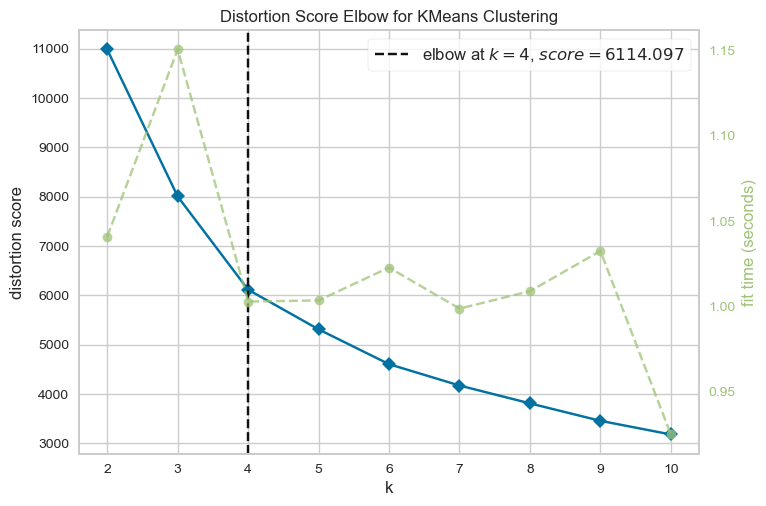

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [23]:
model=KMeans(n_clusters=4,random_state=42)
model.fit(df)
model_predict = model.fit_predict(PCA_ds)
PCA_ds["Clusters"] = model_predict
#thệm các features cluster vào
df["Clusters"]=model_predict
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Spent,Clusters
0,5524,1957,2,4,58138.0,0,0,58,3,8,...,0,0,0,0,0,0,1,57283200000000000,1617,2
1,2174,1954,2,4,46344.0,1,1,38,2,1,...,0,0,0,0,0,0,0,9763200000000000,27,0
2,4141,1965,2,5,71613.0,0,0,26,1,8,...,0,0,0,0,0,0,0,26956800000000000,776,3
3,6182,1984,2,5,26646.0,1,0,26,2,2,...,0,0,0,0,0,0,0,12009600000000000,53,0
4,5324,1981,4,3,58293.0,1,0,94,5,5,...,0,0,0,0,0,0,0,13910400000000000,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,2,9,...,0,0,0,0,0,0,0,32918400000000000,1341,2
2236,4001,1946,4,5,64014.0,2,1,56,7,8,...,0,0,0,1,0,0,0,1641600000000000,444,2
2237,7270,1981,2,2,56981.0,0,0,91,1,2,...,0,1,0,0,0,0,0,13392000000000000,1241,3
2238,8235,1956,3,5,69245.0,0,1,8,2,6,...,0,0,0,0,0,0,0,13478400000000000,843,3


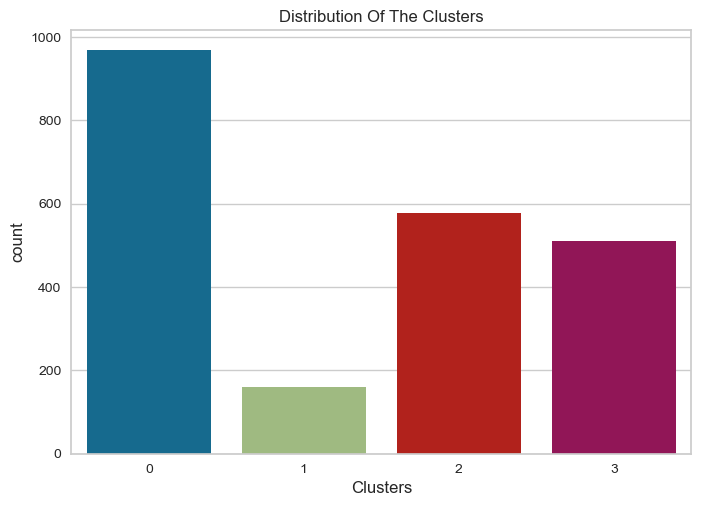

In [24]:
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

In [25]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Spent,Clusters
0,5524,1957,2,4,58138.0,0,0,58,3,8,...,0,0,0,0,0,0,1,57283200000000000,1617,2
1,2174,1954,2,4,46344.0,1,1,38,2,1,...,0,0,0,0,0,0,0,9763200000000000,27,0
2,4141,1965,2,5,71613.0,0,0,26,1,8,...,0,0,0,0,0,0,0,26956800000000000,776,3
3,6182,1984,2,5,26646.0,1,0,26,2,2,...,0,0,0,0,0,0,0,12009600000000000,53,0
4,5324,1981,4,3,58293.0,1,0,94,5,5,...,0,0,0,0,0,0,0,13910400000000000,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,46,2,9,...,0,0,0,0,0,0,0,32918400000000000,1341,2
2236,4001,1946,4,5,64014.0,2,1,56,7,8,...,0,0,0,1,0,0,0,1641600000000000,444,2
2237,7270,1981,2,2,56981.0,0,0,91,1,2,...,0,1,0,0,0,0,0,13392000000000000,1241,3
2238,8235,1956,3,5,69245.0,0,1,8,2,6,...,0,0,0,0,0,0,0,13478400000000000,843,3


In [26]:
clust_0=df[df["Clusters"] == 0]

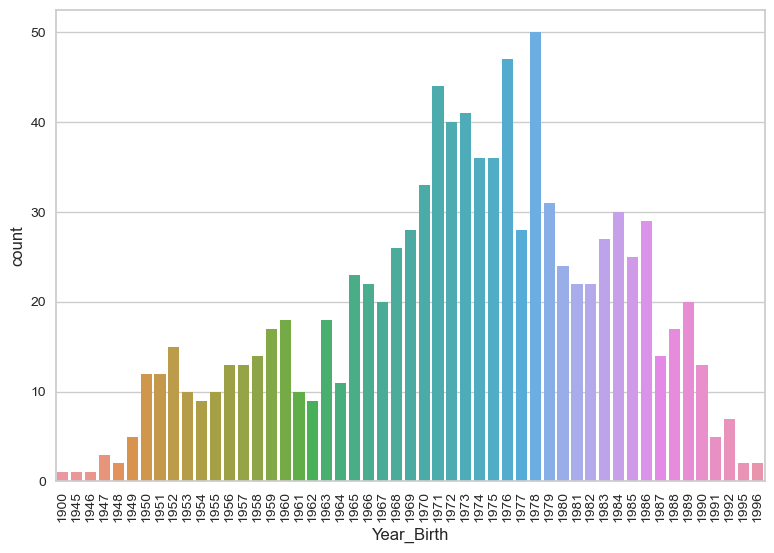

In [27]:
pl = sns.countplot(x=clust_0["Year_Birth"])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()